Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score ,accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 1st Data set exploration

In [3]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\cars data.csv")
df


,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2
...,...,...,...,...,...,...,...,...,...,...,...
1440,2021 Maruti Ertiga VXI SHVS,862000,2021,1462,No,Manual,19901,1,Petrol,1,0
1441,2015 Maruti Ciaz ZXI,507000,2015,1373,No,Manual,50022,1,Petrol,5,2
1442,2019 Maruti Baleno DELTA PETROL 1.2,554000,2019,1197,Yes,Manual,58679,1,Petrol,24,4
1443,2017 Maruti Ciaz S 1.4 MT PETROL,557000,2017,1373,Yes,Manual,73948,2,Petrol,4,5


In [4]:
df.describe()

,Price,Manufacturing_year,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts
count,1.445000e+03,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,5.263543e+05,2017.817301,1142.104498,50588.903114,1.285121,9.597232,3.228374
std,1.963696e+05,2.986554,169.020818,27339.562631,0.489877,8.398637,3.364578
min,1.390000e+05,2010.000000,796.000000,1207.000000,1.000000,0.000000,0.000000
25%,3.900000e+05,2016.000000,998.000000,28803.000000,1.000000,3.000000,0.000000
50%,5.010000e+05,2018.000000,1197.000000,47849.000000,1.000000,8.000000,2.000000
75%,6.310000e+05,2020.000000,1197.000000,70337.000000,2.000000,14.000000,5.000000
max,1.599000e+06,2023.000000,1462.000000,124716.000000,3.000000,43.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine capacity     1445 non-null   int64 
 4   Spare key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


Data Normalization


In [6]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Standard Scaling (Z-score)
standard_scaler = StandardScaler()
df_standard_scaled2 = df.copy()
df_standard_scaled2[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])


In [7]:
df_standard_scaled2.describe()

,Price,Manufacturing_year,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts
count,1.445000e+03,1.445000e+03,1.445000e+03,1.445000e+03,1.445000e+03,1.445000e+03,1.445000e+03
mean,8.851051e-17,-3.775465e-14,4.659095e-16,-1.106381e-16,1.684158e-16,-9.834502e-17,2.704488e-17
std,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00
min,-1.973261e+00,-2.618405e+00,-2.048412e+00,-1.806869e+00,-5.822276e-01,-1.143109e+00,-9.598503e-01
25%,-6.946162e-01,-6.087049e-01,-8.528795e-01,-7.971395e-01,-5.822276e-01,-7.857841e-01,-9.598503e-01
50%,-1.291600e-01,6.119501e-02,3.248979e-01,-1.002522e-01,-5.822276e-01,-1.902433e-01,-3.652164e-01
75%,5.330860e-01,7.310949e-01,3.248979e-01,7.225768e-01,1.459809e+00,5.244056e-01,5.267346e-01
max,5.464272e+00,1.735945e+00,1.893295e+00,2.712288e+00,3.501845e+00,3.978542e+00,7.067708e+00


{'whiskers': [<matplotlib.lines.Line2D at 0x17c52766a50>,
 'caps': [<matplotlib.lines.Line2D at 0x17c52766e40>,
 'boxes': [<matplotlib.lines.Line2D at 0x17c52722ea0>],
 'medians': [<matplotlib.lines.Line2D at 0x17c52767470>],
 'fliers': [<matplotlib.lines.Line2D at 0x17c52767770>],
 'means': []}

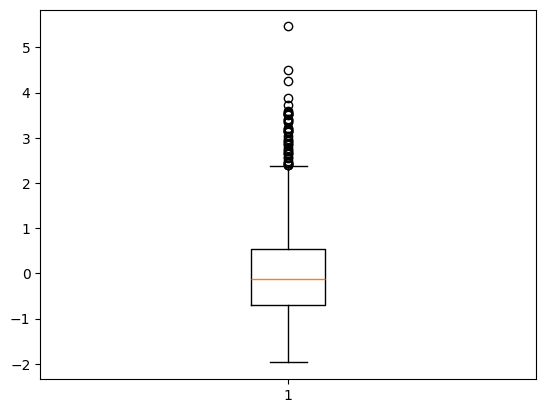

In [8]:
plt.boxplot(df_standard_scaled2['Price'])

Data Cleaning


In [9]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

df_no_outliers = remove_outliers_iqr(df_standard_scaled2, numerical_cols)

{'whiskers': [<matplotlib.lines.Line2D at 0x17c54d2a150>,
 'caps': [<matplotlib.lines.Line2D at 0x17c54d2a630>,
 'boxes': [<matplotlib.lines.Line2D at 0x17c54d29e50>],
 'medians': [<matplotlib.lines.Line2D at 0x17c54d2ac00>],
 'fliers': [<matplotlib.lines.Line2D at 0x17c54d2af00>],
 'means': []}

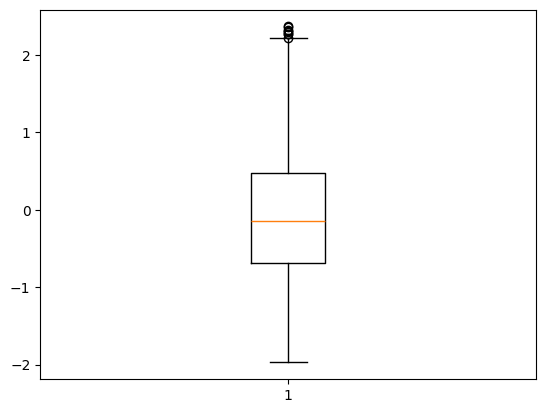

In [10]:
plt.boxplot(df_no_outliers['Price'])

In [11]:
df_no_outliers.describe()

,Price,Manufacturing_year,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts
count,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000
mean,-0.077876,-0.003497,-0.062628,0.000192,0.010130,-0.059944,-0.057479
std,0.823188,0.959368,0.957861,0.981952,1.001257,0.885844,0.874298
min,-1.973261,-2.283455,-2.048412,-1.806869,-0.582228,-1.143109,-0.959850
25%,-0.684428,-0.608705,-0.852879,-0.774564,-0.582228,-0.785784,-0.959850
50%,-0.149537,0.061195,0.324898,-0.093154,-0.582228,-0.190243,-0.365216
75%,0.477050,0.731095,0.324898,0.717162,1.459809,0.524406,0.526735
max,2.366998,1.735945,1.893295,2.712288,3.501845,2.430136,2.607953


Visualization

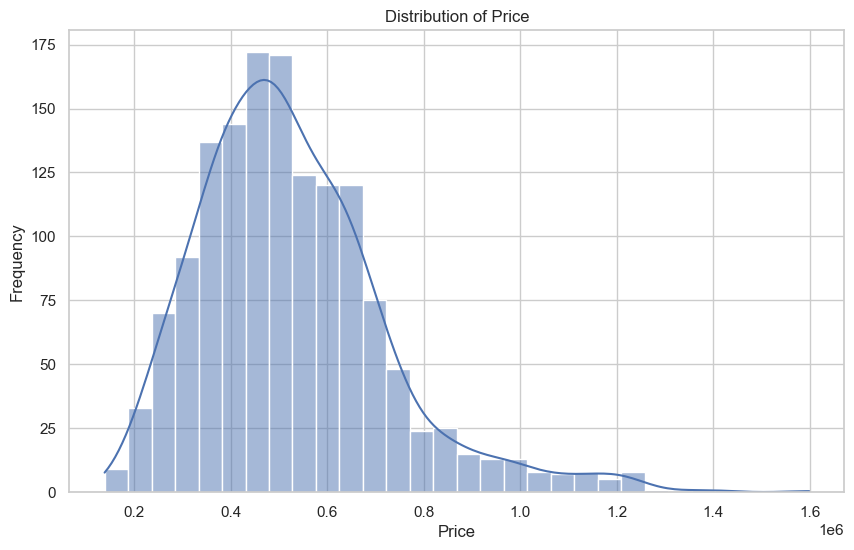

In [12]:
# Distribution of Price
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
if 'Price' in df.columns:
    sns.histplot(df['Price'], kde=True, bins=30)
    plt.title('Distribution of Price')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

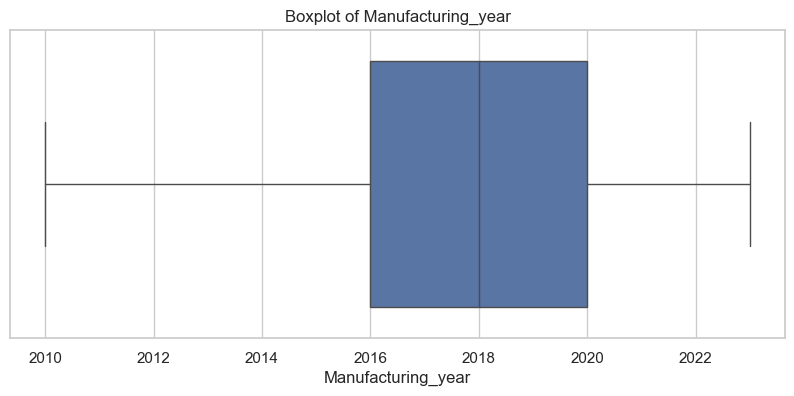

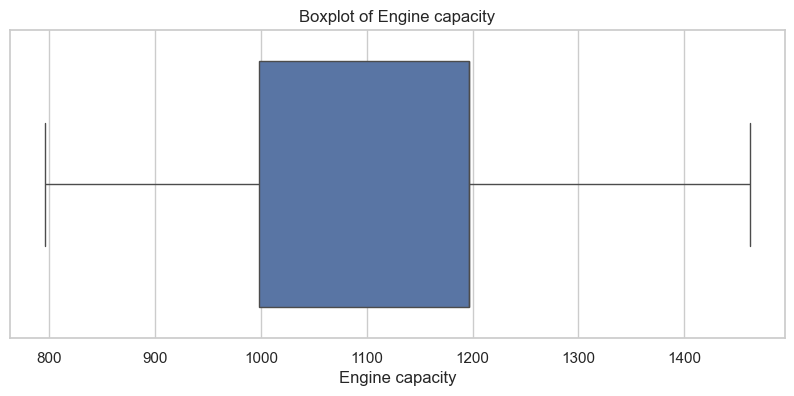

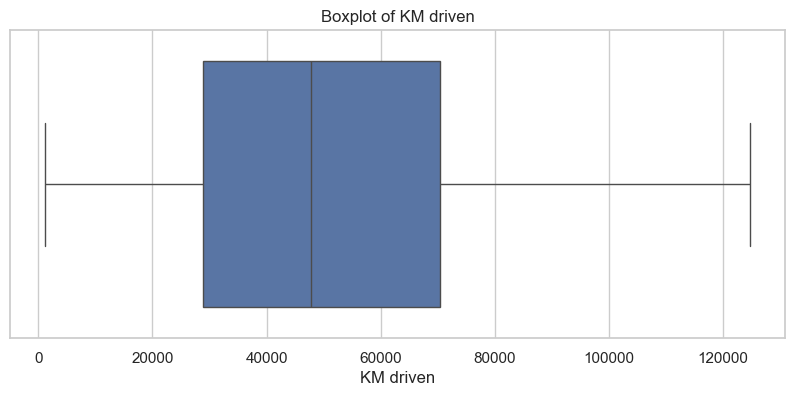

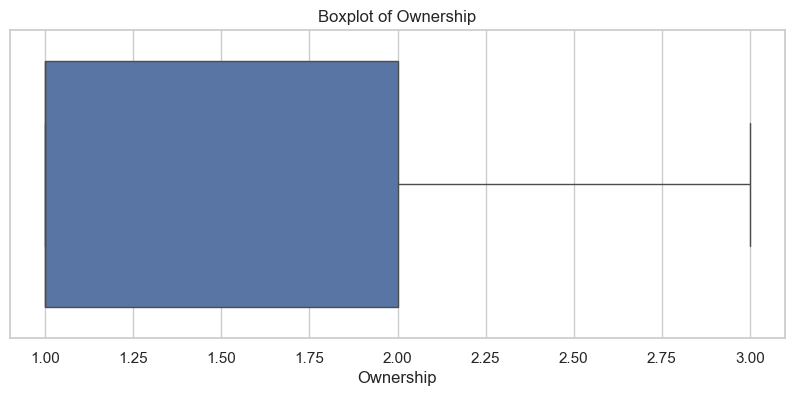

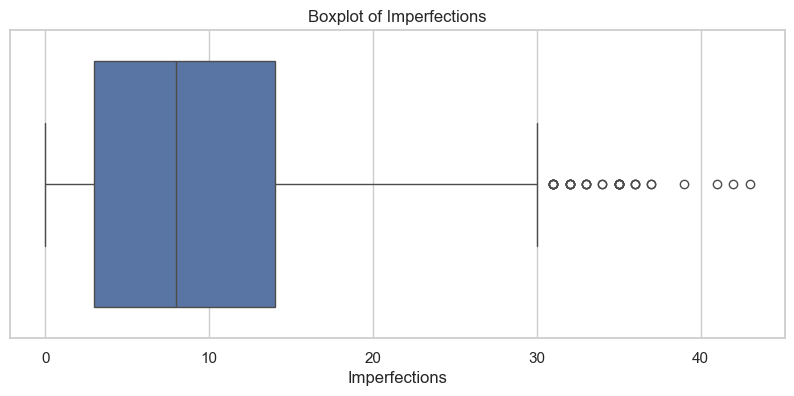

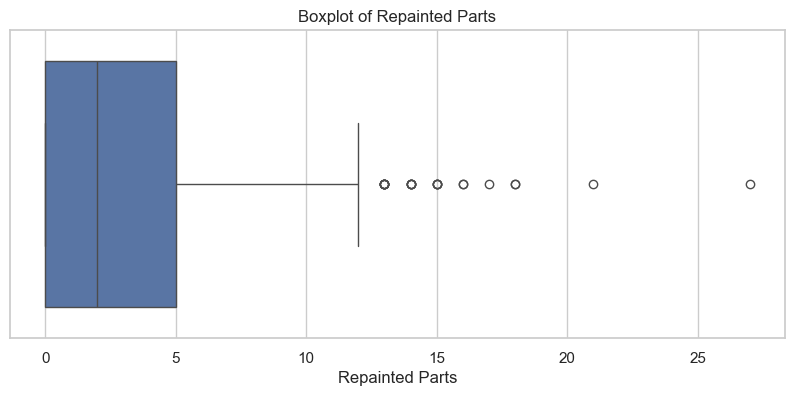

In [13]:
#Box plots for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'Price']

for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

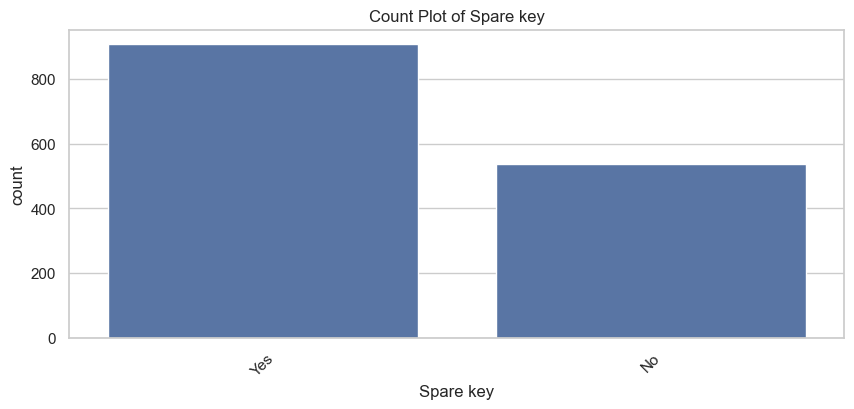

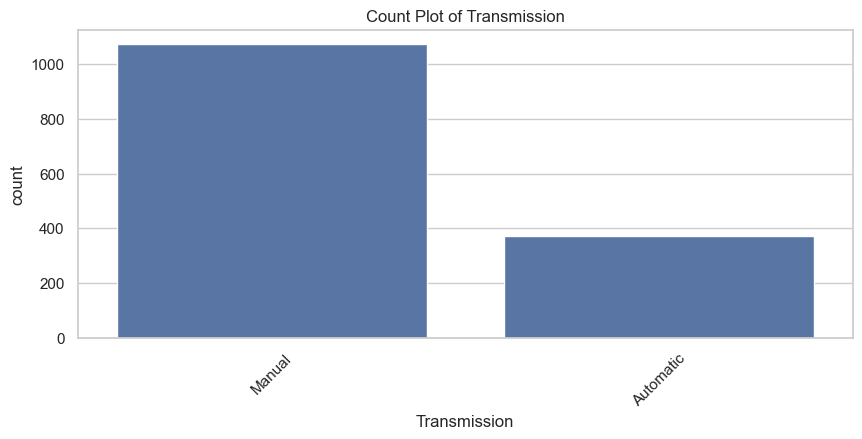

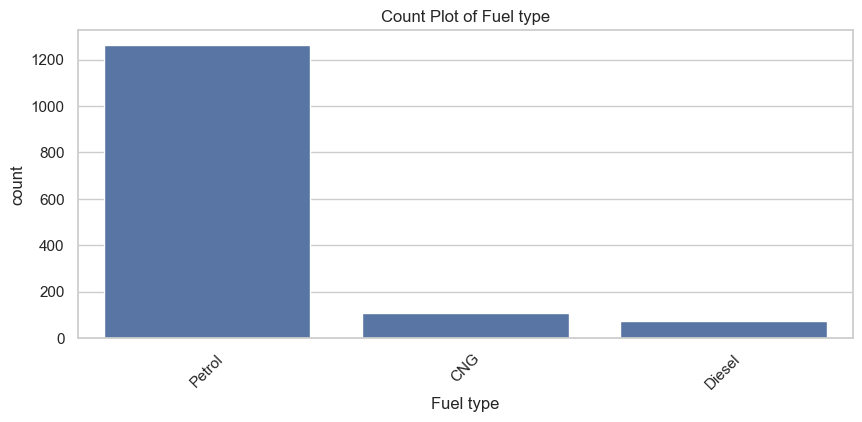

In [14]:
#Count plot for categorical features
cat= df.select_dtypes(include=['object']).columns.tolist()
skip= ['Model Name']
for col in cat:
    if col in skip:
        continue
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')
    plt.show()

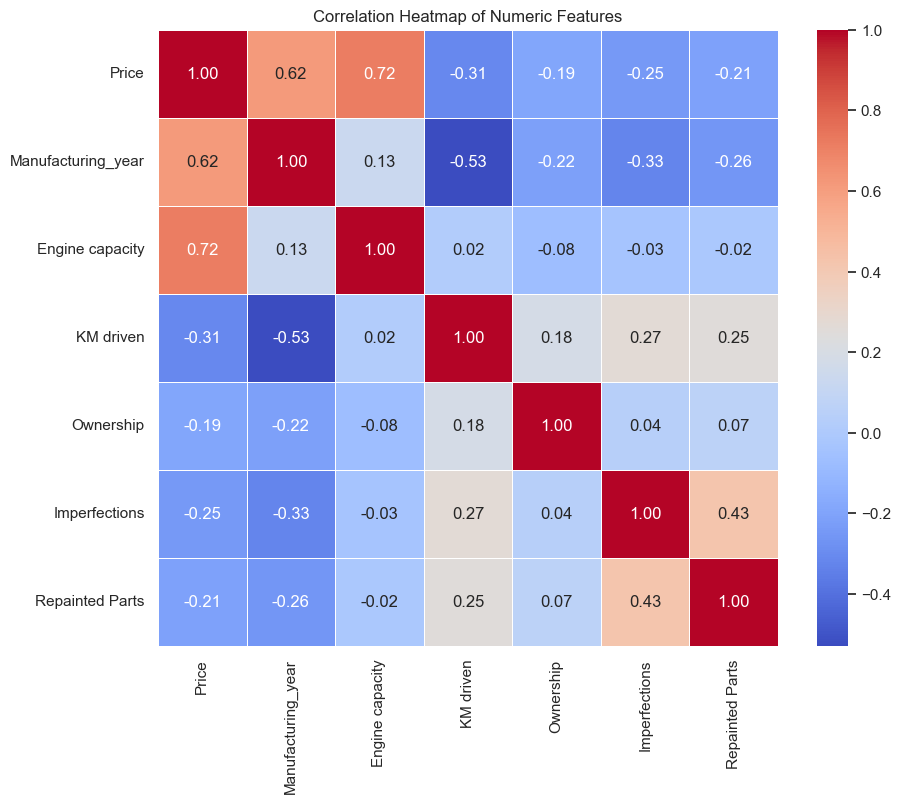

In [15]:
numerical_cols2 = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix =df_standard_scaled2[numerical_cols2].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


## Single Linear Regression

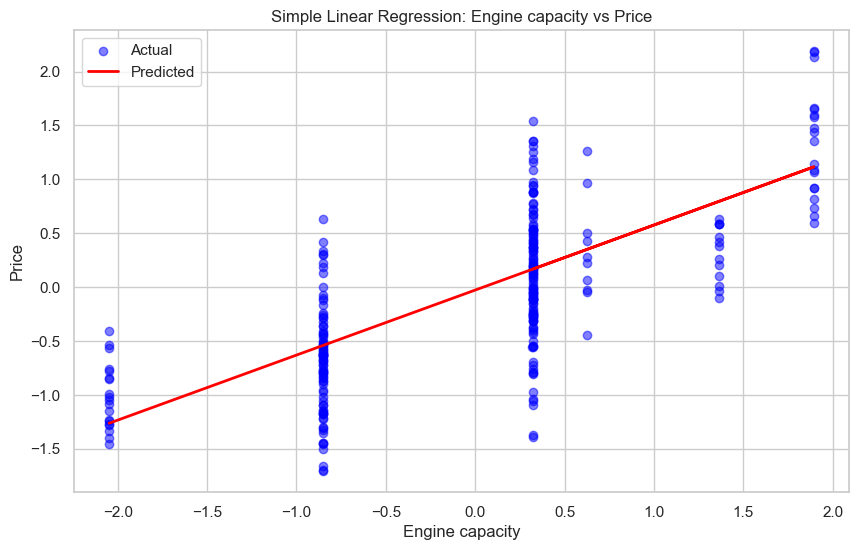

Simple Linear Regression Results:
R² Score: 0.5185
Mean Squared Error: 0.30
Intercept: -0.03
Coefficient: 0.603373


In [16]:
x= df_no_outliers[['Engine capacity']]
y= df_no_outliers['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#plot 
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression: Engine capacity vs Price')
plt.xlabel('Engine capacity')
plt.ylabel('Price')
plt.legend()
plt.show()

#Model evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Simple Linear Regression Results:')
print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Intercept: {model.intercept_:.2f}')
print(f'Coefficient: {model.coef_[0]:.6f}')

## Multiple Linear Regression


In [17]:
X2=df_no_outliers[['Engine capacity','Manufacturing_year','KM driven']]
Y2=df_no_outliers['Price']
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, train_size=0.8, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#Model evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Multiple Linear Regression Results:')
print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Intercept: {model.intercept_:.2f}')
print(f'Coefficient: {model.coef_[0]:.6f}')

Multiple Linear Regression Results:
R² Score: 0.8001
Mean Squared Error: 0.12
Intercept: -0.03
Coefficient: 0.589388


## Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
poly_reg = PolynomialFeatures(degree = 6)
X_poly = poly_reg.fit_transform(df_no_outliers[['Engine capacity','Manufacturing_year','KM driven']])
y=df_no_outliers['Price']
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred2 = lin_reg_2.predict(X_poly)
r_poly= r2_score(y, y_pred2)
mse_poly = mean_squared_error(y, y_pred2)

print('Polynomial Regression Results:')
print(f'R² Score: {r_poly:.2f}')
print(f'Mean Squared Error: {mse_poly:.2f}')

Polynomial Regression Results:
R² Score: 0.82
Mean Squared Error: 0.12
